# 0.0. Imports

In [54]:
import random
import pandas as pd
import numpy  as np
import warnings

from sklearn    import model_selection as ms
from sklearn    import preprocessing   as pp
from sklearn    import metrics         as m
from scikitplot import metrics         as mt

from keras import models as ml
from keras import layers as l

warnings.filterwarnings('ignore')

## 0.1. Auxiliar Functions

## 0.2. Load Data

In [3]:
# load training set of user
data_users = pd.read_csv('../Datasets/train_users_2.csv', low_memory=False)

# load web sessions log for users
data_sessions = pd.read_csv('../Datasets/sessions.csv', low_memory=False)

# 1.0. Data Description

In [4]:
df01_users = data_users.copy()

df01_sessions = data_sessions.copy()

## 1.1. Data Types

In [5]:
df01_users.dtypes

id                          object
date_account_created        object
timestamp_first_active       int64
date_first_booking          object
gender                      object
age                        float64
signup_method               object
signup_flow                  int64
language                    object
affiliate_channel           object
affiliate_provider          object
first_affiliate_tracked     object
signup_app                  object
first_device_type           object
first_browser               object
country_destination         object
dtype: object

In [6]:
df01_sessions.dtypes

user_id           object
action            object
action_type       object
action_detail     object
device_type       object
secs_elapsed     float64
dtype: object

## 1.2. Data Dimensions

### 1.2.1. Data Users Dimensions 

In [7]:
print( f'Number of rows of users dataset: {df01_users.shape[0]}')
print( f'Number of columnss of users dataset: {df01_users.shape[1]}')

Number of rows of users dataset: 213451
Number of columnss of users dataset: 16


### 1.2.2. Data Sessions Dimensions

This dataset will not be used in this first cycle due to the granularity being action and we want to be user_id for now.

In [8]:
print( f'Number of rows of sessions dataset: {df01_sessions.shape[0]}')
print( f'Number of columnss of session dataset: {df01_sessions.shape[1]}')

Number of rows of sessions dataset: 10567737
Number of columnss of session dataset: 6


## 1.3. Check NA

In [9]:
df01_users.isna().sum()

id                              0
date_account_created            0
timestamp_first_active          0
date_first_booking         124543
gender                          0
age                         87990
signup_method                   0
signup_flow                     0
language                        0
affiliate_channel               0
affiliate_provider              0
first_affiliate_tracked      6065
signup_app                      0
first_device_type               0
first_browser                   0
country_destination             0
dtype: int64

In [10]:
df01_users.isna().sum()/df01_users.shape[0]

id                         0.000000
date_account_created       0.000000
timestamp_first_active     0.000000
date_first_booking         0.583473
gender                     0.000000
age                        0.412226
signup_method              0.000000
signup_flow                0.000000
language                   0.000000
affiliate_channel          0.000000
affiliate_provider         0.000000
first_affiliate_tracked    0.028414
signup_app                 0.000000
first_device_type          0.000000
first_browser              0.000000
country_destination        0.000000
dtype: float64

## 1.4. Fill NA

To increase time, in this first cycle, the NA data will not be threatened and will just drop, even if important information is lost, such as an entire NDF response class.

In [11]:
df01_users = df01_users.dropna()

## 1.5. Change Data Type

In [12]:
df01_users.sample(1)

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
25692,0jav842ium,2012-05-28,20120528224832,2012-05-29,MALE,36.0,facebook,0,zh,direct,direct,linked,Web,iPad,Mobile Safari,US


In [13]:
# change date type
df01_users['date_account_created'] = pd.to_datetime(df01_users['date_account_created'])
df01_users['date_first_booking'] = pd.to_datetime(df01_users['date_first_booking'])

# change datetime type
df01_users['timestamp_first_active'] = pd.to_datetime(df01_users['timestamp_first_active'], format='%Y%m%d%H%M%S')

# change age to int
df01_users['age'] = df01_users['age'].astype(np.int64)

In [14]:
df01_users.sample(1)

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
54002,f1oowtmhmx,2012-12-31,2012-12-31 06:04:48,2013-07-21,FEMALE,29,facebook,0,en,direct,direct,linked,Web,Mac Desktop,Chrome,US


In [15]:
df01_users.dtypes

id                                 object
date_account_created       datetime64[ns]
timestamp_first_active     datetime64[ns]
date_first_booking         datetime64[ns]
gender                             object
age                                 int64
signup_method                      object
signup_flow                         int64
language                           object
affiliate_channel                  object
affiliate_provider                 object
first_affiliate_tracked            object
signup_app                         object
first_device_type                  object
first_browser                      object
country_destination                object
dtype: object

## 1.6. Check Balanced Data

Data with an unbalance of 70% for the US class.

In [16]:
df01_users['country_destination'].value_counts(normalize=True)

US       0.708864
other    0.110854
FR       0.054085
IT       0.029763
GB       0.025935
ES       0.024864
CA       0.015696
DE       0.012454
NL       0.008801
AU       0.006366
PT       0.002318
Name: country_destination, dtype: float64

# 2.0. Feature Engineering

To increase time, no feature engineering will be done for this first cycle.

In [17]:
df02_users = df01_users.copy()

# 3.0. Data Filtering

To increase time, the Data Filtering stage will be skipped in this first cycle.

In [18]:
df03_users = df02_users.copy()

## 3.1. Filtering Rows

## 3.2. Columns Selection

# 4.0. Data Exploratory Analysis

To increase time, the EDA stage will be skipped in this first cycle.

In [19]:
df04_users = df03_users.copy()

# 5.0. Data Preparation

In [20]:
df05_users = df04_users.copy()

In [21]:
# dummy variable
df05_users_dummy = pd.get_dummies(df05_users.drop(['id', 'country_destination'], axis=1))

# join id and country destination
df05_users = pd.concat( [df05_users[['id', 'country_destination']], df05_users_dummy], axis=1 )

# 6.0. Feature Selection

Original date will be discarded in this first cycle because data must first be derived from them, like years and months.

In [22]:
df06_users = df05_users.copy()

In [23]:
cols_drop = ['date_account_created', 'timestamp_first_active', 'date_first_booking'] # original dates
df06_users = df06_users.drop(cols_drop, axis=1)

In [24]:
# training dataset
X = df06_users.drop( 'country_destination', axis=1 )

#  training response dataset
y = df06_users['country_destination']

In [25]:
# Split dataset into training and test (validation)
X_train, X_test, y_train, y_test = ms.train_test_split(X, y, test_size=0.2, random_state=32)

# 7.0. Machine Learing Model

In [26]:
x_train = X_train.drop('id', axis=1)
x_test = X_test.drop('id', axis=1)

## 7.1. Baseline Model - Random

In [42]:
country_list = df06_users['country_destination'].drop_duplicates().sort_values().tolist()

k_num = y_test.shape[0]

country_weights = df06_users['country_destination'].value_counts(normalize=True).sort_index().tolist()

yhat_random = random.choices(population=country_list,
                             weights=country_weights,
                             k=k_num)

len(yhat_random)

13635

### 7.1.2. Baseline Model Performance

Accuracy 0.5182984965163183
Balanced Accuracy: 0.09267713127118976
Kappa Score: 0.004380773601849186
              precision    recall  f1-score   support

          AU       0.02      0.02      0.02       101
          CA       0.01      0.01      0.01       214
          DE       0.01      0.01      0.01       170
          ES       0.03      0.03      0.03       345
          FR       0.05      0.05      0.05       710
          GB       0.04      0.04      0.04       344
          IT       0.05      0.04      0.05       423
          NL       0.01      0.01      0.01       128
          PT       0.00      0.00      0.00        36
          US       0.71      0.71      0.71      9624
       other       0.11      0.11      0.11      1540

    accuracy                           0.52     13635
   macro avg       0.09      0.09      0.09     13635
weighted avg       0.52      0.52      0.52     13635



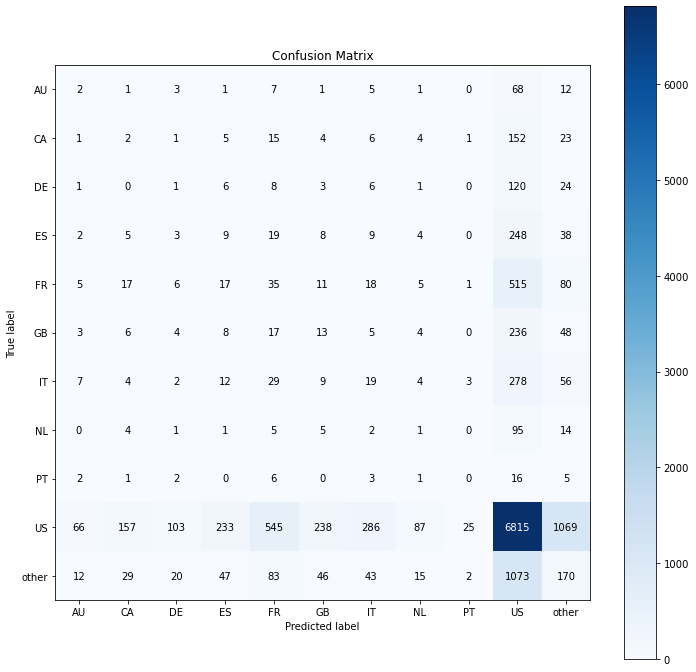

In [47]:
# Accuracy
acc_random = m.accuracy_score( y_test, yhat_random )
print(f'Accuracy {acc_random}')

# Balanced Accuracy
balanced_acc_random = m.balanced_accuracy_score(y_test, yhat_random)
print(f'Balanced Accuracy: {balanced_acc_random}')

# Kappa Metrics
kappa_random = m.cohen_kappa_score(y_test, yhat_random)
print(f'Kappa Score: {kappa_random}')

# Classification report
print(m.classification_report(y_test, yhat_random))

# Confusion Matrix
mt.plot_confusion_matrix(y_test, yhat_random, normalize=False, figsize=(12,12));

## 7.2. Neural Network - MLP

In [27]:
ohe = pp.OneHotEncoder()

y_train_nn = ohe.fit_transform(y_train.values.reshape(-1, 1)).toarray()

In [28]:
# model definition
model = ml.Sequential()
model.add( l.Dense(128, input_dim=x_train.shape[1], activation='relu') )
model.add( l.Dense(11, activation='softmax') )

# model compile
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# train model
model.fit(x_train, y_train_nn, epochs=100)

Epoch 1/100
1705/1705 [==============================] - 2s 1ms/step - loss: 1.3962 - accuracy: 0.6994
Epoch 2/100
1705/1705 [==============================] - 2s 1ms/step - loss: 1.2812 - accuracy: 0.7082
Epoch 3/100
1705/1705 [==============================] - 2s 1ms/step - loss: 1.2361 - accuracy: 0.7084
Epoch 4/100
1705/1705 [==============================] - 2s 1ms/step - loss: 1.2252 - accuracy: 0.7083
Epoch 5/100
1705/1705 [==============================] - 2s 1ms/step - loss: 1.2045 - accuracy: 0.7084
Epoch 6/100
1705/1705 [==============================] - 2s 1ms/step - loss: 1.1852 - accuracy: 0.7086
Epoch 7/100
1705/1705 [==============================] - 2s 1ms/step - loss: 1.1710 - accuracy: 0.7084
Epoch 8/100
1705/1705 [==============================] - 2s 1ms/step - loss: 1.1663 - accuracy: 0.7086
Epoch 9/100
1705/1705 [==============================] - 2s 1ms/step - loss: 1.1507 - accuracy: 0.7087
Epoch 10/100
1705/1705 [==============================] - 2s 1ms/step - l

1705/1705 [==============================] - 2s 1ms/step - loss: 1.1010 - accuracy: 0.7115
Epoch 80/100
1705/1705 [==============================] - 2s 994us/step - loss: 1.1010 - accuracy: 0.7115
Epoch 81/100
1705/1705 [==============================] - 2s 991us/step - loss: 1.1004 - accuracy: 0.7115
Epoch 82/100
1705/1705 [==============================] - 2s 1ms/step - loss: 1.1004 - accuracy: 0.7118
Epoch 83/100
1705/1705 [==============================] - 2s 1ms/step - loss: 1.0999 - accuracy: 0.7118
Epoch 84/100
1705/1705 [==============================] - 2s 977us/step - loss: 1.0999 - accuracy: 0.7116
Epoch 85/100
1705/1705 [==============================] - 2s 1ms/step - loss: 1.0996 - accuracy: 0.7119
Epoch 86/100
1705/1705 [==============================] - 2s 996us/step - loss: 1.0993 - accuracy: 0.7119
Epoch 87/100
1705/1705 [==============================] - 2s 991us/step - loss: 1.0988 - accuracy: 0.7118
Epoch 88/100
1705/1705 [==============================] - 2s 990us/

### 7.2.2. NN Performance

In [29]:
# prediction
pred_nn = model.predict(x_test)

# invert prediction
yhat_nn = ohe.inverse_transform(pred_nn)

# test dataset prepare with real results
y_test_nn = y_test.to_numpy()
yhat_nn = yhat_nn.reshape(1, -1)[0]

Accuracy: 0.7026769343601027
Balanced Accuracy: 0.09129557494739854
Kappa Score: -0.0006580927128863046
              precision    recall  f1-score   support

          AU       0.00      0.00      0.00       101
          CA       0.00      0.00      0.00       214
          DE       0.20      0.01      0.01       170
          ES       0.00      0.00      0.00       345
          FR       0.25      0.00      0.00       710
          GB       0.00      0.00      0.00       344
          IT       0.00      0.00      0.00       423
          NL       0.00      0.00      0.00       128
          PT       0.00      0.00      0.00        36
          US       0.71      1.00      0.83      9624
       other       0.10      0.00      0.00      1540

    accuracy                           0.70     13635
   macro avg       0.11      0.09      0.08     13635
weighted avg       0.52      0.70      0.58     13635



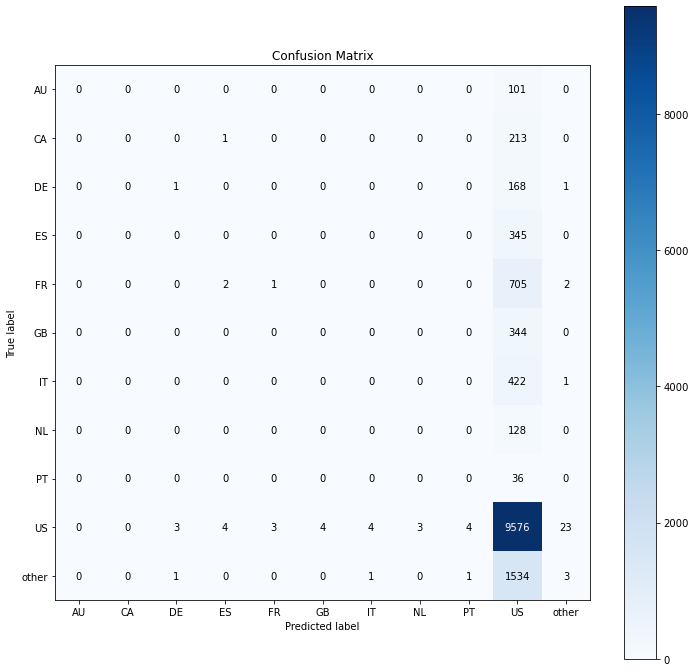

In [53]:
# Accuracy
acc_nn = m.accuracy_score( y_test_nn, yhat_nn )
print(f'Accuracy: {acc_nn}')

# Balanced Accuracy
balanced_acc_nn = m.balanced_accuracy_score(y_test_nn, yhat_nn)
print(f'Balanced Accuracy: {balanced_acc_nn}')

# Kappa Metrics
kappa_nn = m.cohen_kappa_score(y_test_nn, yhat_nn)
print(f'Kappa Score: {kappa_nn}')

# Classification report
print(m.classification_report(y_test_nn, yhat_nn))


# Confusion Matrix
mt.plot_confusion_matrix( y_test_nn, yhat_nn, normalize=False, figsize=(12,12));

In [31]:
# check balanced results
pd.DataFrame(yhat_nn).value_counts(normalize=True)

US       0.995380
other    0.002200
ES       0.000513
DE       0.000367
IT       0.000367
PT       0.000367
FR       0.000293
GB       0.000293
NL       0.000220
dtype: float64

**Result**

Although the model presents a reasonable result with 70% accuracy, the model is highly biased by unbalanced data, which is natural due how a Neural Network works.

In the next ciclys will look at some of the following metrics to check for unbalanced data:

    - Balanced Accuracy
    - F-Score Balanced
    - Recall-Precison
    - ROC
    - Kappa Metrics
    - Matthew Metrics

# 8.0. Hyper Parameter Tuning

Hyper Parameter Tuning will not be considered until the most optimal machine learning model is selected, at this first cycle was considered only one model to complete the cycle and go through for all the major phases to validate the feasibility of the project.

# 9.0. Error Translation and Interpretation

# 10.0. Deploy Model

No models will be deployed yet.